# Market Breadth: 52-Week Highs/Lows
## New Highs New Lows

https://www.investopedia.com/university/marketbreadth/marketbreadth2.asp

https://www.marketinout.com/technical_analysis.php?t=New_Highs-New_Lows&id=70

https://stockcharts.com/school/doku.php?id=chart_school:market_indicators:high_low_index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^gspc'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03 00:00:00-05:00,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06 00:00:00-05:00,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07 00:00:00-05:00,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08 00:00:00-05:00,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3849.280029,3003680000
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,3839.500000,2979870000


In [4]:
new_high = df['Adj Close'].rolling(52).max() # 52-week lows
new_low = df['Adj Close'].rolling(52).min() # 52-week highs

In [5]:
print("Yesterday's Value:", df['Adj Close'][-2]) # Yesterday's Value
print("Current Value:", df['Adj Close'][-1]) # Current's Value

Yesterday's Value: 3849.280029296875
Current Value: 3839.5


In [6]:
new_high = new_high.dropna()
new_low = new_low.dropna()
#Record_High_Percent = (new_high /(new_high + new_low)) * 100
#nhnl = new_high - new_low

In [7]:
# 1. Cumulative New High/Low Line
# Today's Value = Yesterday's Value + (Today's New Highs - Today's New Lows) 
df['CNHL'] = df['Adj Close'][1] + (new_high - new_low)

In [8]:
# 2. New-High Minus New-Low Oscillator 
# Oscillator = Today\'s New Highs – Today\'s New Lows
df['Oscillator'] = new_high - new_low

In [9]:
# 3. New High/Low Ratio
# Ratio = Today\'s New Highs / Today\'s New Lows 
df['Ratio'] = new_high / new_low

In [10]:
# 4. Percentage of New-High to New High + New Low 
# % New Highs = Today\'s New Highs / (Today\'s New Highs + Today\'s New Lows) 
# % New Lows = Today\'s New Lows / (Today\'s New Highs + Today\'s New Lows) 
df['NH'] = new_high/ (new_high + new_low)
df['NL'] = new_high/ (new_high + new_low)

In [11]:
# 5. Percentage of New Highs to Total Market 
# % New Highs = Today\'s New Highs / Total # of Listed Stocks in Given Market 
# % New Lows = Today\'s New Lows / Total # of Listed Stocks in Given Market 
df['NHTM'] = new_high / 5 # Number of stocks
df['NLTM'] = new_low / 5 # Number of stocks

In [12]:
df = df.dropna()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,CNHL,Oscillator,Ratio,NH,NL,NHTM,NLTM
Date,,,,,,,,,,,,,
2020-03-17 00:00:00-04:00,2425.659912,2553.929932,2367.040039,2529.189941,2529.189941,8370250000,4234.870117,1000.02002,1.419097,0.586623,0.586623,677.22998,477.225977
2020-03-18 00:00:00-04:00,2436.500000,2453.570068,2280.520020,2398.100098,2398.100098,8799300000,4234.870117,1000.02002,1.419097,0.586623,0.586623,677.22998,477.225977
2020-03-19 00:00:00-04:00,2393.479980,2466.969971,2319.780029,2409.389893,2409.389893,7956100000,4234.870117,1000.02002,1.419097,0.586623,0.586623,677.22998,477.225977
2020-03-20 00:00:00-04:00,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9053950000,4316.080078,1081.22998,1.469097,0.594994,0.594994,677.22998,460.983984
2020-03-23 00:00:00-04:00,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,7411380000,4383.600098,1148.75000,1.513431,0.602137,0.602137,677.22998,447.479980
2020-03-24 00:00:00-04:00,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7563150000,4383.600098,1148.75000,1.513431,0.602137,0.602137,677.22998,447.479980
2020-03-25 00:00:00-04:00,2457.770020,2571.419922,2407.530029,2475.560059,2475.560059,8300010000,4383.600098,1148.75000,1.513431,0.602137,0.602137,677.22998,447.479980
2020-03-26 00:00:00-04:00,2501.290039,2637.010010,2500.719971,2630.070068,2630.070068,7766990000,4383.600098,1148.75000,1.513431,0.602137,0.602137,677.22998,447.479980
2020-03-27 00:00:00-04:00,2555.870117,2615.909912,2520.020020,2541.469971,2541.469971,6201670000,4383.600098,1148.75000,1.513431,0.602137,0.602137,677.22998,447.479980


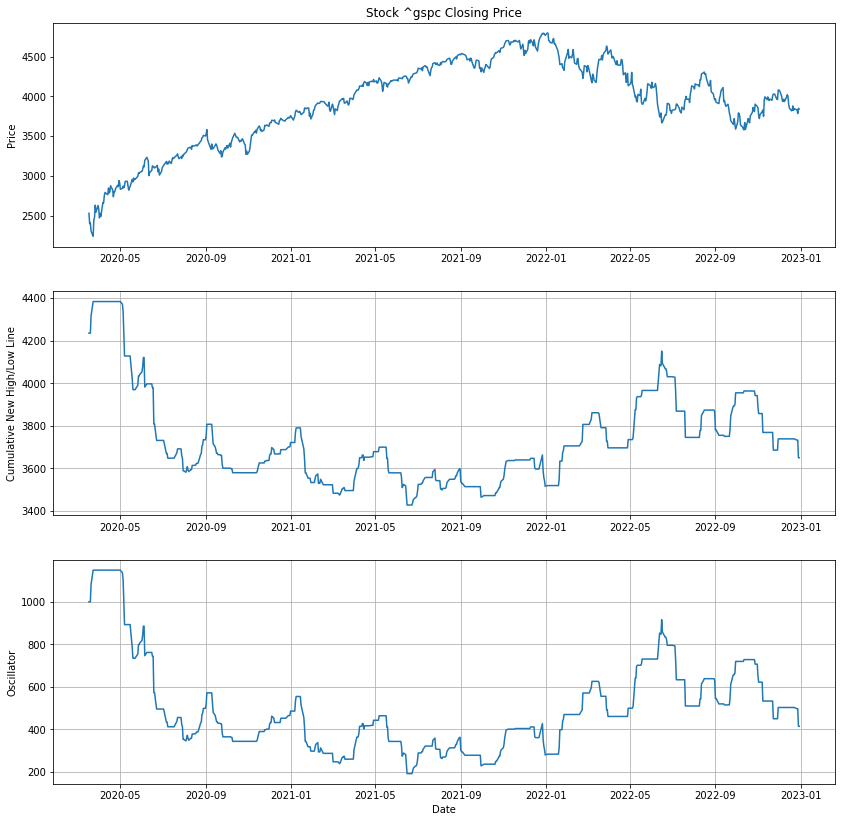

In [13]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CNHL'], label='Cumulative New High/Low Line')
#ax2.axhline(y=0, color='red')
ax2.set_ylabel('Cumulative New High/Low Line')
ax2.grid()

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['Oscillator'], label='Oscillator')
#ax3.axhline(y=50, color='red')
ax3.set_ylabel('Oscillator')
ax3.set_xlabel('Date')
ax3.grid()